# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)


## **Fetching Movie URL's**

In [ ]:
# Find all div elements with class 'title-list-grid__item' which represent movie items in the webpage
movies_url_items = soup.find_all('div', class_='title-list-grid__item')

movies_url_list =[]

for elmnt in movies_url_items:

  # Extract the URL for each movie from the anchor tag's 'href' attribute
  url = elmnt.find("a")["href"]
  all_urls = "https://www.justwatch.com" + url

  movies_url_list.append(all_urls)
movies_url_list

['https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/tumbbad',
 'https://www.justwatch.com/in/movie/kill-2024',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/sector-36',
 'https://www.justwatch.com/in/movie/stree',
 'https://www.justwatch.com/in/movie/thalapathy-68',
 'https://www.justwatch.com/in/movie/thangalaan',
 'https://www.justwatch.com/in/movie/project-k',
 'https://www.justwatch.com/in/movie/saripodhaa-sanivaaram',
 'https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/double-ismart',
 'https://www.justwatch.com/in/movie/siddharth-roy',
 'https://www.justwatch.com/in/movie/laila-majnu',
 'https://www.justwatch.com/in/movie/inside-out-2',
 'https://www.justwatch.com/in/movie/nunakuzhi',
 'https://www.justwatch.com/in/movie/rebel-ridge',
 'https://www.justwatch.com/in/movie/the-fall-guy',
 'https://w

## **Scrapping Movie Title**

In [ ]:
movies_title = []
for url in movies_url_list:

    # fetch the movie details by using fetch_movie_urls() function and passing the movies links(url) in parameter
    soup_d = fetch_movie_urls(url)

    # split the title by '(' and take [0] index
    title = soup_d.find('h1').text.split('(')[0].strip()

    movies_title.append(title)
movies_title

['Stree 2: Sarkate Ka Aatank',
 'Tumbbad',
 'Kill',
 'Deadpool & Wolverine',
 'Sector 36',
 'Stree',
 'The Greatest of All Time',
 'Thangalaan',
 'Kalki 2898-AD',
 'Saripodhaa Sanivaaram',
 'Bad Newz',
 'Munjya',
 'Double Ismart',
 'Siddharth Roy',
 'Laila Majnu',
 'Inside Out 2',
 'Nunakkuzhi',
 'Rebel Ridge',
 'The Fall Guy',
 'Mr Bachchan',
 'The Beast',
 'Raayan',
 'Thalavan',
 'Maharaja',
 'Salaar',
 'Aavesham',
 'Ulajh',
 'Vaazha: Biopic of a Billion Boys',
 'Prisoners',
 'Je Jatt Vigad Gya',
 '365 Days',
 'Trisha on the Rocks',
 'Devara Part 1',
 'It Ends with Us',
 'Pechi',
 'The Buckingham Murders',
 'Gifted',
 'Auron Mein Kahan Dum Tha',
 'Bhediya',
 'Khel Khel Mein',
 'Kottukkaali',
 'Committee Kurrollu',
 'Mathu Vadalara',
 'Despicable Me 4',
 'Bad Boys: Ride or Die',
 'Challengers',
 '#AAY',
 'Kishkindha Kaandam',
 'Demonte Colony',
 'Longlegs',
 'Golam',
 'Dune: Part Two',
 'Joker',
 'Laapataa Ladies',
 'Apocalypto',
 'Godzilla x Kong: The New Empire',
 'Sam Bahadur',
 'F

## **Scrapping release Year**

In [ ]:
# getting list of movies year
movies_year = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    year = soup_d.find('span', class_='release-year').text.strip("( )")
    movies_year.append(year)
movies_year

['2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2013',
 '2024',
 '2020',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2017',
 '2024',
 '2022',
 '2024',
 '2024',
 '2024',
 '2019',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2015',
 '2024',
 '2024',
 '2024',
 '2019',
 '2024',
 '2006',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2001',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2023',
 '2020',
 '2023',
 '2024',
 '2019',
 '2023',
 '2024',
 '2018',
 '2024',
 '2024',
 '2004',
 '2017',
 '2000',
 '2024',
 '2019',
 '2023',
 '2008',
 '2003',
 '2022',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2011',
 '2014']

## **Scrapping Genres**

In [ ]:
# Fetching movies genres list
movies_genre = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)

    # string='Genres' used because class_='detail-infos__subheading' is multiple and Genres was inside div tag so take find_next_sibling() function
    genre = soup_d.find('h3', class_='detail-infos__subheading',string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip().split(',')

    movies_genre.append(genre)
movies_genre

[['Comedy', ' Horror'],
 ['Fantasy', ' Horror', ' Drama', ' Mystery & Thriller', ' Made in Europe'],
 ['Drama', ' Mystery & Thriller', ' Action & Adventure', ' Crime'],
 ['Action & Adventure', ' Comedy', ' Science-Fiction'],
 ['Drama', ' Crime', ' Mystery & Thriller'],
 ['Horror', ' Comedy', ' Drama'],
 ['Mystery & Thriller', ' Action & Adventure', ' Drama', ' Science-Fiction'],
 ['Action & Adventure', ' Fantasy', ' History', ' Drama'],
 ['Drama'],
 ['Action & Adventure', ' Mystery & Thriller', ' Drama'],
 ['Romance', ' Comedy', ' Drama'],
 ['Comedy', ' Horror'],
 ['Mystery & Thriller', ' Action & Adventure', ' Science-Fiction'],
 ['Drama', ' Romance'],
 ['Drama', ' Romance'],
 ['Animation', ' Drama', ' Comedy', ' Kids & Family', ' Fantasy'],
 ['Comedy', ' Kids & Family'],
 ['Crime', ' Action & Adventure', ' Mystery & Thriller', ' Drama'],
 ['Comedy', ' Drama', ' Romance', ' Action & Adventure'],
 ['Drama', ' Romance', ' Action & Adventure', ' Mystery & Thriller', ' Crime'],
 ['Drama',

## **Scrapping IMBD Rating**

In [ ]:
# Fetching IMDB rating
movies_rating = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    rating = soup_d.find('div', class_='jw-scoring-listing__rating').text.split('(')[0].strip()

    # For Some movies IMDB rating not givin only rotten rommato is givin like (79%) so I replaced the rotten tammatos with None
    if re.findall(r'%',rating):
        rating = None

    movies_rating.append(rating)
movies_rating

['7.4',
 '8.2',
 '7.6',
 '7.9',
 '7.3',
 '7.5',
 '6.3',
 '7.1',
 None,
 '7.2',
 '5.1',
 '6.5',
 '2.9',
 '7.2',
 '7.7',
 '7.6',
 '6.8',
 '6.9',
 '6.9',
 '3.6',
 '6.5',
 '6.5',
 '7.2',
 '8.5',
 '6.6',
 '7.8',
 '6.5',
 '7.3',
 '8.2',
 '4.9',
 '3.3',
 '5.4',
 '6.5',
 '6.5',
 '6.0',
 '7.2',
 '7.6',
 '7.3',
 '6.7',
 '7.1',
 '6.5',
 '8.7',
 '8.2',
 '6.2',
 '6.6',
 '7.2',
 '6.5',
 '8.6',
 '7.0',
 '6.7',
 '7.2',
 '8.5',
 '8.4',
 '8.4',
 '7.8',
 '6.1',
 '7.7',
 '7.5',
 '6.2',
 '7.8',
 '6.6',
 '6.9',
 '7.9',
 '7.6',
 '7.0',
 '5.4',
 '6.6',
 '7.4',
 '8.2',
 '7.1',
 '8.3',
 '8.6',
 '6.7',
 '7.4',
 '6.1',
 '7.2',
 '7.0',
 '6.7',
 '6.4',
 '8.5',
 '6.6',
 '9.1',
 '7.8',
 '5.3',
 '7.6',
 '5.1',
 '7.2',
 '6.5',
 '7.7',
 '8.2',
 '7.8',
 '6.7',
 '6.0',
 '5.3',
 '3.4',
 '5.2',
 '7.9',
 '8.3',
 '6.3',
 '7.8']

## **Scrapping Runtime/Duration**

In [ ]:
# Fetching list of Movies Runtime
movies_runtime = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    runtime = soup_d.find('h3', class_='detail-infos__subheading',string="Runtime").find_next_sibling('div',class_='detail-infos__value').text.strip()
    movies_runtime.append(runtime)
movies_runtime

['2h 27min',
 '1h 53min',
 '1h 45min',
 '2h 8min',
 '2h 4min',
 '2h 8min',
 '3h 3min',
 '2h 36min',
 '2h 56min',
 '2h 50min',
 '2h 20min',
 '2h 3min',
 '2h 36min',
 '2h 28min',
 '2h 19min',
 '1h 37min',
 '2h 5min',
 '2h 12min',
 '2h 6min',
 '2h 40min',
 '2h 26min',
 '2h 25min',
 '2h 13min',
 '2h 21min',
 '2h 55min',
 '2h 38min',
 '2h 14min',
 '2h 5min',
 '2h 33min',
 '2h 12min',
 '1h 54min',
 '2h 52min',
 '2h 56min',
 '2h 10min',
 '1h 50min',
 '1h 47min',
 '1h 41min',
 '2h 30min',
 '2h 36min',
 '2h 15min',
 '1h 44min',
 '2h 36min',
 '2h 10min',
 '1h 34min',
 '1h 55min',
 '2h 12min',
 '2h 22min',
 '2h 13min',
 '1h 56min',
 '1h 41min',
 '2h 0min',
 '2h 47min',
 '2h 2min',
 '2h 2min',
 '2h 19min',
 '1h 55min',
 '2h 30min',
 '2h 28min',
 '2h 14min',
 '2h 19min',
 '2h 3min',
 '2h 14min',
 '2h 22min',
 '2h 32min',
 '2h 5min',
 '2h 39min',
 '2h 30min',
 '1h 59min',
 '2h 19min',
 '2h 0min',
 '3h 0min',
 '2h 23min',
 '1h 42min',
 '2h 5min',
 '3h 24min',
 '1h 41min',
 '1h 49min',
 '2h 29min',
 '

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
movies_age_rating = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    h3_tag = soup_d.find('h3',class_='detail-infos__subheading',string='Age rating')
    if h3_tag:
      age_rating  = h3_tag.find_next_sibling('div',class_='detail-infos__value').text.strip()
    movies_age_rating.append(age_rating)
movies_age_rating

['UA',
 'A',
 'A',
 'A',
 'A',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'UA',
 'U',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 'A',
 'A',
 'A',
 'UA',
 'UA',
 'A',
 'A',
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'U',
 'A',
 'A',
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 'UA',
 'A',
 'UA',
 'A',
 'UA',
 'UA',
 'A',
 'U',
 'UA',
 'UA',
 'UA',
 'UA',
 'U',
 'U',
 'U',
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 'U',
 'U',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'U',
 'A',
 'A',
 'U',
 'U',
 'A',
 'A',
 'UA',
 'A',
 'A',
 'A',
 'A',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA']

## **Fetching Production Countries Details**

In [ ]:
production_countries = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    country = soup_d.find('h3', class_='detail-infos__subheading',string=" Production country ").find_next_sibling('div',class_='detail-infos__value').text.strip()
    production_countries.append(country)
production_countries


['India',
 'India, Sweden',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'Australia, Canada, United States',
 'India',
 'France, Canada',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'Poland',
 'India',
 'India',
 'United States',
 'India',
 'United Kingdom, India',
 'United Kingdom, United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'United States',
 'Italy, United States',
 'India',
 'India',
 'India',
 'Canada, United States',
 'India',
 'United States',
 'United States, Canada',
 'India',
 'United States, United Kingdom',
 'United States',
 'India',
 'Australia, United States',
 'India',
 'India',
 'United States',
 'South Korea',
 'India',
 'United States, United Kingdom',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'India, United S

## **Fetching Streaming Service Details**

In [ ]:
# Fetching the Streaming service details
stream_services = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    stream_tag = soup_d.find('div', class_='picture-wrapper').find_all('img')
    service = [img['alt'] for img in stream_tag]
    stream_services.append(service)
stream_services

[['Amazon Video'],
 ['Bookmyshow'],
 ['Hotstar'],
 ['Apple TV'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Netflix'],
 ['Bookmyshow'],
 ['Amazon Prime Video'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Hotstar'],
 ['Amazon Prime Video'],
 ['aha'],
 ['Zee5'],
 ['Apple TV'],
 ['Zee5'],
 ['Netflix'],
 ['Apple TV'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Amazon Prime Video'],
 ['Apple TV+'],
 ['Netflix'],
 ['VI movies and tv'],
 ['Amazon Prime Video'],
 ['Netflix'],
 ['Hotstar'],
 ['Amazon Prime Video'],
 ['Apple TV+'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Bookmyshow'],
 ['Apple TV'],
 ['Amazon Prime Video'],
 ['Bookmyshow'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Jio Cinema'],
 ['Apple TV+'],
 ['Amazon Prime Video'],
 ['Bookmyshow'],
 ['Amazon Prime Video'],
 ['Apple TV'],
 ['Apple TV'],
 ['Amazon Prime Video'],
 ['Netflix'],
 ['Bookmyshow'],
 ['Zee5'],
 ['Apple TV+'],
 ['Amazon Prime Video'],
 ['Apple TV'],
 ['Amazon Prime Video'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['App

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd

# Create a DataFrame from the scraped data
movies_df = pd.DataFrame({
    'Title': movies_title,
    'Release Year': movies_year,
    'Genre': movies_genre,
    'IMDB Rating': movies_rating,
    'Runtime': movies_runtime,
    'Age Rating': movies_age_rating,
    'Production Country': production_countries,
    'Streaming Service': stream_services,
    'URL': movies_url_list,
    'type': 'movie'
})

In [ ]:
# # Display the first 10 rows of the 'data_show' DataFrame
movies_df.head(10)

,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Service,URL,type
0,Stree 2: Sarkate Ka Aatank,2024,"[Comedy, Horror]",7.4,2h 27min,UA,India,[Amazon Video],https://www.justwatch.com/in/movie/stree-2,movie
1,Tumbbad,2018,"[Fantasy, Horror, Drama, Mystery & Thriller...",8.2,1h 53min,A,"India, Sweden",[Bookmyshow],https://www.justwatch.com/in/movie/tumbbad,movie
2,Kill,2024,"[Drama, Mystery & Thriller, Action & Adventu...",7.6,1h 45min,A,India,[Hotstar],https://www.justwatch.com/in/movie/kill-2024,movie
3,Deadpool & Wolverine,2024,"[Action & Adventure, Comedy, Science-Fiction]",7.9,2h 8min,A,United States,[Apple TV],https://www.justwatch.com/in/movie/deadpool-3,movie
4,Sector 36,2024,"[Drama, Crime, Mystery & Thriller]",7.3,2h 4min,A,India,[Netflix],https://www.justwatch.com/in/movie/sector-36,movie
5,Stree,2018,"[Horror, Comedy, Drama]",7.5,2h 8min,UA,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/stree,movie
6,The Greatest of All Time,2024,"[Mystery & Thriller, Action & Adventure, Dra...",6.3,3h 3min,UA,India,[Netflix],https://www.justwatch.com/in/movie/thalapathy-68,movie
7,Thangalaan,2024,"[Action & Adventure, Fantasy, History, Drama]",7.1,2h 36min,UA,India,[Bookmyshow],https://www.justwatch.com/in/movie/thangalaan,movie
8,Kalki 2898-AD,2024,[Drama],None,2h 56min,UA,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/project-k,movie
9,Saripodhaa Sanivaaram,2024,"[Action & Adventure, Mystery & Thriller, Drama]",7.2,2h 50min,UA,India,[Netflix],https://www.justwatch.com/in/movie/saripodhaa-...,movie


In [ ]:
# Display Information about Movie DataFrame
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release Year        100 non-null    object
 2   Genre               100 non-null    object
 3   IMDB Rating         99 non-null     object
 4   Runtime             100 non-null    object
 5   Age Rating          100 non-null    object
 6   Production Country  100 non-null    object
 7   Streaming Service   100 non-null    object
 8   URL                 100 non-null    object
 9   type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


 - Movie title
  - Release year
  - Genre
  - IMDb rating
  - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
  - URL to the movie page on JustWatch

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

def fetch_tvShow_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

urls = fetch_tvShow_urls(tv_url)


## **Fetching Tv shows Url details**

In [ ]:
# Fetch Tv shows URL
tv_show_url  = []
tv_show = urls.find_all('div',class_='title-list-grid__item')

for url in tv_show:
    url = url.find("a")["href"]
    all_urls = "https://www.justwatch.com" + url

    tv_show_url.append(all_urls)
tv_show_url

['https://www.justwatch.com/in/tv-show/from',
 'https://www.justwatch.com/in/tv-show/taaza-khabar',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/the-penguin',
 'https://www.justwatch.com/in/tv-show/adams-sweet-agony',
 'https://www.justwatch.com/in/tv-show/call-me-bae',
 'https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power',
 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/the-old-man',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/ic-814',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/agatha-house-of-harkness',
 'https://www.justwatch.com/in/tv-show/house-of-the-dragon',
 'https://www.justwatch.com/in/tv-show/tulsa-king',
 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored',
 'https://www.justwatch.com/in/tv-show/only-mur

## **Fetching Tv Show Title details**

In [ ]:
# Fetching Tv Show Title
tv_show_title = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    title = soup_d.find('h1',class_="title-detail-hero__details__title").text.split('(')[0].strip()

    tv_show_title.append(title)
tv_show_title

['From',
 'Taaza Khabar',
 'Mirzapur',
 'The Penguin',
 "Adam's Sweet Agony",
 'Call Me Bae',
 'The Lord of the Rings: The Rings of Power',
 'Gyaarah Gyaarah',
 'Shōgun',
 'The Old Man',
 'Game of Thrones',
 'IC 814: The Kandahar Hijack',
 'Panchayat',
 'Agatha All Along',
 'House of the Dragon',
 'Tulsa King',
 'XXX: Uncensored',
 'Only Murders in the Building',
 'Nobody Wants This',
 'The Boys',
 'Bigg Boss',
 'Mastram',
 'Tell Me Lies',
 'Attack on Titan',
 'Shekhar Home',
 'Breaking Bad',
 'The Perfect Couple',
 'The Great Indian Kapil Show',
 'Farzi',
 'Slow Horses',
 'Monsters: The Lyle and Erik Menendez Story',
 'Into the Fire: The Lost Daughter',
 'Auto Shankar',
 'Love Next Door',
 'Apharan',
 'Naruto Shippūden',
 'The Rookie',
 'Demon Slayer: Kimetsu no Yaiba',
 'Dark',
 'Gandii Baat',
 'No Gain No Love',
 'Lost',
 'Sunflower',
 'Kaos',
 'Euphoria',
 'The Bear',
 'Money Heist',
 'The Family Man',
 'Tanaav',
 'Terminator Zero',
 'Industry',
 'Hidden Love',
 'Person of Interest

## **Fetching Release Year**

In [ ]:
# Fetching list of release year of tv shows
tv_show_relase_year = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    year = soup_d.find('span', class_='release-year').text.strip('( )')

    tv_show_relase_year.append(year)
tv_show_relase_year

['2022',
 '2023',
 '2018',
 '2024',
 '2024',
 '2024',
 '2022',
 '2024',
 '2024',
 '2022',
 '2011',
 '2024',
 '2020',
 '2024',
 '2022',
 '2022',
 '2018',
 '2021',
 '2024',
 '2019',
 '2006',
 '2020',
 '2022',
 '2013',
 '2024',
 '2008',
 '2024',
 '2024',
 '2023',
 '2022',
 '2024',
 '2024',
 '2019',
 '2024',
 '2018',
 '2007',
 '2018',
 '2019',
 '2017',
 '2018',
 '2024',
 '2004',
 '2021',
 '2024',
 '2019',
 '2022',
 '2017',
 '2019',
 '2022',
 '2024',
 '2020',
 '2023',
 '2011',
 '2020',
 '2020',
 '2013',
 '2014',
 '2020',
 '2024',
 '2023',
 '2024',
 '2014',
 '2020',
 '2009',
 '2024',
 '2018',
 '2024',
 '2022',
 '2021',
 '2020',
 '2024',
 '2016',
 '2024',
 '2024',
 '2019',
 '2024',
 '2011',
 '2021',
 '2018',
 '2002',
 '2002',
 '2019',
 '2020',
 '2023',
 '2010',
 '2023',
 '2005',
 '2009',
 '2024',
 '2023',
 '2021',
 '2016',
 '2024',
 '2013',
 '2024',
 '2006',
 '2005',
 '2024',
 '2010',
 '2013']

## **Fetching TV Show Genre Details**

In [ ]:
# Fetching the list of genre of tv shows
tv_show_genre = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    genre = soup_d.find('h3', class_='detail-infos__subheading',string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip().split(',')

    tv_show_genre.append(genre)
tv_show_genre



[['Science-Fiction', ' Mystery & Thriller', ' Drama', ' Horror'],
 ['Science-Fiction',
  ' Mystery & Thriller',
  ' Action & Adventure',
  ' Comedy',
  ' Drama',
  ' Fantasy'],
 ['Action & Adventure', ' Drama', ' Crime', ' Mystery & Thriller'],
 ['Drama', ' Fantasy', ' Crime'],
 ['Animation'],
 ['Romance', ' Drama', ' Comedy'],
 ['Action & Adventure', ' Science-Fiction', ' Drama', ' Fantasy'],
 ['Drama', ' Fantasy', ' Science-Fiction'],
 ['War & Military', ' Drama', ' History'],
 ['Action & Adventure', ' Drama', ' Mystery & Thriller'],
 ['Action & Adventure', ' Science-Fiction', ' Drama', ' Fantasy'],
 ['Drama', ' History', ' Mystery & Thriller', ' War & Military'],
 ['Drama', ' Comedy'],
 ['Science-Fiction',
  ' Action & Adventure',
  ' Mystery & Thriller',
  ' Comedy',
  ' Drama',
  ' Fantasy'],
 ['Action & Adventure', ' Science-Fiction', ' Drama', ' Fantasy', ' Romance'],
 ['Drama', ' Crime'],
 ['Comedy', ' Drama', ' Romance'],
 ['Comedy', ' Crime', ' Drama', ' Mystery & Thriller'],

## **Fetching IMDB Rating Details**

In [ ]:
# Fetching list of IMDB rating
tv_show_rating = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    rating = soup_d.find('div', class_='jw-scoring-listing__rating')
    if rating:
        rating = rating.text.split('(')[0].strip()

    tv_show_rating.append(rating)
tv_show_rating


['7.7',
 '8.1',
 '8.4',
 '8.8',
 None,
 '6.2',
 '6.9',
 '8.2',
 '8.6',
 '7.6',
 '9.2',
 '5.6',
 '9.0',
 '6.8',
 '8.4',
 '8.0',
 '4.8',
 '8.1',
 '8.2',
 '8.7',
 '3.6',
 '6.9',
 '6.7',
 '9.1',
 '8.2',
 '9.5',
 '6.5',
 '6.8',
 '8.3',
 '8.2',
 '7.9',
 '7.6',
 '6.8',
 '8.2',
 '8.2',
 '8.7',
 '8.0',
 '8.6',
 '8.7',
 '3.4',
 '7.9',
 '8.3',
 '7.4',
 '7.5',
 '8.3',
 '8.6',
 '8.2',
 '8.7',
 None,
 '7.0',
 '7.3',
 None,
 '8.5',
 '6.8',
 '8.5',
 '8.8',
 '7.5',
 '6.6',
 '7.7',
 '7.3',
 '8.7',
 '8.9',
 '8.6',
 '8.5',
 '6.8',
 '8.7',
 '8.4',
 '8.6',
 '8.2',
 '9.2',
 '7.8',
 '8.7',
 '7.0',
 '7.5',
 '9.1',
 '7.4',
 '6.7',
 '8.6',
 '7.7',
 '9.3',
 '8.4',
 '7.8',
 '6.4',
 '7.7',
 '9.1',
 '8.7',
 '8.3',
 '7.7',
 '6.5',
 '7.5',
 '8.3',
 '8.3',
 '7.1',
 '8.5',
 '6.4',
 '8.6',
 '8.1',
 '7.4',
 '8.5',
 '9.0']

## **Fetching Age Rating Details**

In [ ]:
# Fetching list of age rating of tv shows
tv_show_age_rating = []
for url in  tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    age_rating = soup_d.find('h3',class_='detail-infos__subheading',string='Age rating')
    if age_rating:
        age_rating = age_rating.find_next_sibling('div',class_='detail-infos__value').text.strip()

    tv_show_age_rating.append(age_rating)
tv_show_age_rating



[None,
 None,
 'A',
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 'U',
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 'A',
 'UA',
 None,
 'A',
 'A',
 None,
 None,
 'A',
 'A',
 None,
 'UA',
 None,
 None,
 'U',
 None,
 None,
 None,
 'A',
 None,
 'U',
 'A',
 'A',
 'A',
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 'U',
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 'U',
 None,
 None,
 'A',
 None,
 'A',
 None,
 'A',
 None,
 None,
 None,
 None,
 'A',
 None,
 'A',
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 'U',
 'A',
 'U',
 'U',
 None,
 None,
 'UA',
 None,
 None,
 'A',
 None,
 'A',
 'U',
 'A',
 None,
 'U']

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
tv_show_production_country = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)
    country = soup_d.find('h3', class_='detail-infos__subheading',string=" Production country ").find_next_sibling('div',class_='detail-infos__value').text.strip()

    tv_show_production_country.append(country)
tv_show_production_country

['United States',
 'India',
 'India',
 'United States',
 'Japan',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'Japan',
 'India',
 'United States',
 'United States',
 'India',
 'India',
 'United Kingdom',
 'United States',
 'United States',
 'India',
 'South Korea',
 'India',
 'Japan',
 'United States',
 'Japan',
 'Germany',
 'India',
 'South Korea',
 'United States',
 'India',
 'United Kingdom',
 'United States',
 'United States',
 'Spain',
 'India',
 'India',
 'United States, Japan',
 'United States, United Kingdom',
 'China',
 'United States',
 'United States',
 'India',
 'United Kingdom',
 'United States',
 'India',
 'South Korea',
 'South Korea',
 'Japan',
 'United States',
 'Japan, United States',
 'United States',
 'South Korea',
 'United States',
 'United St

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
tv_show_stream = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)
    pic_tag = soup_d.find('picture', class_='picture-wrapper')

    #  Check if the <picture> tag exists
    if pic_tag:
      # Find all <img> tags within the <picture> tag
      img_tags = pic_tag.find_all('img')

    service = [img['alt'] for img in img_tags]

    tv_show_stream.append(service)
tv_show_stream

[['Amazon Prime Video'],
 ['Amazon Prime Video'],
 ['Amazon Prime Video'],
 ['Jio Cinema'],
 ['Amazon Prime Video'],
 ['Amazon Prime Video'],
 ['Amazon Prime Video'],
 ['Zee5'],
 ['Hotstar'],
 ['Hotstar'],
 ['Jio Cinema'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Hotstar'],
 ['Jio Cinema'],
 ['Jio Cinema'],
 ['Alt Balaji'],
 ['Hotstar'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Hotstar'],
 ['VI movies and tv'],
 ['Hotstar'],
 ['Anime Times Amazon Channel'],
 ['Jio Cinema'],
 ['Netflix'],
 ['Netflix'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Apple TV Plus'],
 ['Netflix'],
 ['Netflix'],
 ['Zee5'],
 ['Netflix'],
 ['Alt Balaji'],
 ['Crunchyroll'],
 ['Crunchyroll'],
 ['Crunchyroll'],
 ['Netflix'],
 ['Alt Balaji'],
 ['Amazon Prime Video'],
 ['Amazon Prime Video'],
 ['Zee5'],
 ['Netflix'],
 ['Jio Cinema'],
 ['Hotstar'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['Sony Liv'],
 ['Netflix'],
 ['Jio Cinema'],
 ['Netflix'],
 ['Netflix'],
 ['Netflix'],
 ['Jio Cinema'],
 ['Netflix'],
 ['Amazon Pri

## **Fetching Duration Details**

In [ ]:
# Fetching the list of runtime of Tv Shows
tv_show_duration = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    duration = soup_d.find('h3', class_='detail-infos__subheading',string="Runtime").find_next_sibling('div',class_='detail-infos__value').text.strip()

    tv_show_duration.append(duration)
tv_show_duration


['50min',
 '30min',
 '50min',
 '1h 1min',
 '3min',
 '39min',
 '1h 8min',
 '44min',
 '59min',
 '53min',
 '58min',
 '38min',
 '35min',
 '39min',
 '1h 2min',
 '40min',
 '22min',
 '35min',
 '26min',
 '1h 1min',
 '1h 15min',
 '28min',
 '50min',
 '25min',
 '42min',
 '47min',
 '51min',
 '57min',
 '56min',
 '45min',
 '52min',
 '1h 16min',
 '30min',
 '1h 20min',
 '24min',
 '24min',
 '42min',
 '26min',
 '56min',
 '44min',
 '1h 8min',
 '43min',
 '38min',
 '50min',
 '58min',
 '34min',
 '50min',
 '45min',
 '34min',
 '28min',
 '57min',
 '45min',
 '44min',
 '31min',
 '47min',
 '58min',
 '42min',
 '43min',
 '1h 7min',
 '1h 1min',
 '24min',
 '1h 1min',
 '24min',
 '21min',
 '58min',
 '50min',
 '59min',
 '33min',
 '33min',
 '52min',
 '58min',
 '1h 1min',
 '57min',
 '56min',
 '30min',
 '34min',
 '21min',
 '1h 11min',
 '48min',
 '59min',
 '23min',
 '49min',
 '41min',
 '41min',
 '1h 28min',
 '58min',
 '50min',
 '42min',
 '34min',
 '33min',
 '39min',
 '57min',
 '23min',
 '45min',
 '54min',
 '53min',
 '44min'

## **Creating TV Show DataFrame**

In [ ]:
import pandas as pd

# Create a DataFrame from the scraped data
tv_shows_df = pd.DataFrame({
    'Title': tv_show_title,
    'Release Year': tv_show_relase_year,
    'Genre': tv_show_genre,
    'IMDB Rating': tv_show_rating,
    'Runtime': tv_show_duration,
    'Age Rating': tv_show_age_rating,
    'Production Country': tv_show_production_country,
    'Streaming Service': tv_show_stream,
    'URL': tv_show_url,
    'type': 'tv_show'
})



In [ ]:
# Display the first 10 rows of the 'data_show' DataFrame
tv_shows_df.head(10)

,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Service,URL,type
0,From,2022,"[Science-Fiction, Mystery & Thriller, Drama,...",7.7,50min,None,United States,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/from,tv_show
1,Taaza Khabar,2023,"[Science-Fiction, Mystery & Thriller, Action...",8.1,30min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/taaza-khabar,tv_show
2,Mirzapur,2018,"[Action & Adventure, Drama, Crime, Mystery ...",8.4,50min,A,India,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/mirzapur,tv_show
3,The Penguin,2024,"[Drama, Fantasy, Crime]",8.8,1h 1min,None,United States,[Jio Cinema],https://www.justwatch.com/in/tv-show/the-penguin,tv_show
4,Adam's Sweet Agony,2024,[Animation],None,3min,None,Japan,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/adams-swe...,tv_show
5,Call Me Bae,2024,"[Romance, Drama, Comedy]",6.2,39min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/call-me-bae,tv_show
6,The Lord of the Rings: The Rings of Power,2022,"[Action & Adventure, Science-Fiction, Drama,...",6.9,1h 8min,None,United States,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/the-lord-...,tv_show
7,Gyaarah Gyaarah,2024,"[Drama, Fantasy, Science-Fiction]",8.2,44min,A,India,[Zee5],https://www.justwatch.com/in/tv-show/gyaarah-g...,tv_show
8,Shōgun,2024,"[War & Military, Drama, History]",8.6,59min,None,United States,[Hotstar],https://www.justwatch.com/in/tv-show/shogun-2024,tv_show
9,The Old Man,2022,"[Action & Adventure, Drama, Mystery & Thriller]",7.6,53min,None,United States,[Hotstar],https://www.justwatch.com/in/tv-show/the-old-man,tv_show


In [ ]:
# Display Information about Tv Show DataFrame
tv_shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release Year        100 non-null    object
 2   Genre               100 non-null    object
 3   IMDB Rating         97 non-null     object
 4   Runtime             100 non-null    object
 5   Age Rating          38 non-null     object
 6   Production Country  100 non-null    object
 7   Streaming Service   100 non-null    object
 8   URL                 100 non-null    object
 9   type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Merging movies_df and tv_shows_df DataFrame to make a Single DataFrame.
movies_shows_df = pd.concat([movies_df, tv_shows_df], ignore_index=True)
movies_shows_df.tail(10)

,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Service,URL,type
190,Jeet Ki Zid,2021,"[Action & Adventure, Drama]",8.3,39min,UA,India,[Zee5],https://www.justwatch.com/in/tv-show/jeet-ki-zid,tv_show
191,Billions,2016,[Drama],8.3,57min,None,United States,[Hotstar],https://www.justwatch.com/in/tv-show/billions,tv_show
192,English Teacher,2024,[Comedy],7.1,23min,None,United States,[Hotstar],https://www.justwatch.com/in/tv-show/english-t...,tv_show
193,Vikings,2013,"[Action & Adventure, Drama, War & Military, ...",8.5,45min,A,Canada,[Netflix],https://www.justwatch.com/in/tv-show/vikings,tv_show
194,Heeramandi: The Diamond Bazaar,2024,"[Drama, History, Romance, War & Military]",6.4,54min,None,India,[Netflix],https://www.justwatch.com/in/tv-show/heeramandi,tv_show
195,Dexter,2006,"[Crime, Drama, Mystery & Thriller]",8.6,53min,A,United States,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/dexter,tv_show
196,Criminal Minds,2005,"[Crime, Drama, Mystery & Thriller]",8.1,44min,U,United States,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/criminal-...,tv_show
197,Twilight of the Gods,2024,"[Action & Adventure, Fantasy, Animation, Sc...",7.4,31min,A,"France, United States",[Netflix],https://www.justwatch.com/in/tv-show/twilight-...,tv_show
198,Spartacus,2010,"[Drama, Romance, Action & Adventure]",8.5,54min,None,United States,[Lionsgate Play],https://www.justwatch.com/in/tv-show/spartacus,tv_show
199,Mahabharatham,2013,"[Drama, Kids & Family, History, War & Milit...",9.0,23min,U,"United States, India",[Hotstar],https://www.justwatch.com/in/tv-show/mahabhara...,tv_show


In [ ]:
# Show only movies and tv shows released in the last 2 years (from current date)

from datetime import datetime

# getting year from current datatime
current_year = datetime.now().year

# Convert 'Release Year' column to numeric type
movies_shows_df['Release Year'] = pd.to_numeric(movies_shows_df['Release Year'], errors='coerce')

last_2_year_df = movies_shows_df[(movies_shows_df['Release Year'] >= current_year - 2)]
last_2_year_df

,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Service,URL,type
0,Stree 2: Sarkate Ka Aatank,2024,"[Comedy, Horror]",7.4,2h 27min,UA,India,[Amazon Video],https://www.justwatch.com/in/movie/stree-2,movie
2,Kill,2024,"[Drama, Mystery & Thriller, Action & Adventu...",7.6,1h 45min,A,India,[Hotstar],https://www.justwatch.com/in/movie/kill-2024,movie
3,Deadpool & Wolverine,2024,"[Action & Adventure, Comedy, Science-Fiction]",7.9,2h 8min,A,United States,[Apple TV],https://www.justwatch.com/in/movie/deadpool-3,movie
4,Sector 36,2024,"[Drama, Crime, Mystery & Thriller]",7.3,2h 4min,A,India,[Netflix],https://www.justwatch.com/in/movie/sector-36,movie
6,The Greatest of All Time,2024,"[Mystery & Thriller, Action & Adventure, Dra...",6.3,3h 3min,UA,India,[Netflix],https://www.justwatch.com/in/movie/thalapathy-68,movie
...,...,...,...,...,...,...,...,...,...,...
188,Life Hill Gayi,2024,"[Comedy, Romance]",6.5,34min,None,India,[Hotstar],https://www.justwatch.com/in/tv-show/life-hill...,tv_show
189,Highway Love,2023,"[Romance, Comedy]",7.5,33min,None,India,[MX Player],https://www.justwatch.com/in/tv-show/highway-love,tv_show
192,English Teacher,2024,[Comedy],7.1,23min,None,United States,[Hotstar],https://www.justwatch.com/in/tv-show/english-t...,tv_show
194,Heeramandi: The Diamond Bazaar,2024,"[Drama, History, Romance, War & Military]",6.4,54min,None,India,[Netflix],https://www.justwatch.com/in/tv-show/heeramandi,tv_show


In [ ]:
# Show only movies and tv shows released which has IMDB rating above 7

imdb_rating_df = movies_shows_df[movies_shows_df['IMDB Rating'] > 7]
imdb_rating_df


,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Service,URL,type
0,Stree 2: Sarkate Ka Aatank,2024,"[Comedy, Horror]",7.4,2h 27min,UA,India,[Amazon Video],https://www.justwatch.com/in/movie/stree-2,movie
1,Tumbbad,2018,"[Fantasy, Horror, Drama, Mystery & Thriller...",8.2,1h 53min,A,"India, Sweden",[Bookmyshow],https://www.justwatch.com/in/movie/tumbbad,movie
2,Kill,2024,"[Drama, Mystery & Thriller, Action & Adventu...",7.6,1h 45min,A,India,[Hotstar],https://www.justwatch.com/in/movie/kill-2024,movie
3,Deadpool & Wolverine,2024,"[Action & Adventure, Comedy, Science-Fiction]",7.9,2h 8min,A,United States,[Apple TV],https://www.justwatch.com/in/movie/deadpool-3,movie
4,Sector 36,2024,"[Drama, Crime, Mystery & Thriller]",7.3,2h 4min,A,India,[Netflix],https://www.justwatch.com/in/movie/sector-36,movie
...,...,...,...,...,...,...,...,...,...,...
195,Dexter,2006,"[Crime, Drama, Mystery & Thriller]",8.6,53min,A,United States,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/dexter,tv_show
196,Criminal Minds,2005,"[Crime, Drama, Mystery & Thriller]",8.1,44min,U,United States,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/criminal-...,tv_show
197,Twilight of the Gods,2024,"[Action & Adventure, Fantasy, Animation, Sc...",7.4,31min,A,"France, United States",[Netflix],https://www.justwatch.com/in/tv-show/twilight-...,tv_show
198,Spartacus,2010,"[Drama, Romance, Action & Adventure]",8.5,54min,None,United States,[Lionsgate Play],https://www.justwatch.com/in/tv-show/spartacus,tv_show


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Convert IMDB Rating from Object data type to float type
movies_shows_df['IMDB Rating'] = movies_shows_df['IMDB Rating'].astype(float)
                                    #or
#movies_shows_df['IMDB Rating'] = pd.to_numeric(movies_shows_df['IMDB Rating'], errors='coerce')

# Calculating the mean of IMDB rating of movies and tv shows
mean_IMDB_rating = movies_shows_df.groupby('type')['IMDB Rating'].mean()
mean_IMDB_rating

,IMDB Rating
type,
movie,6.945455
tv_show,7.843299


## **Analyzing Top Genres**

In [ ]:
#  To find top genres - explode() - Extract individual genres, str.strip() - strip whitespace, and value_counts() - count occurrences.

genre_count = movies_shows_df['Genre'].explode().str.strip().value_counts()
genre_count

,count
Genre,
Drama,142
Mystery & Thriller,97
Action & Adventure,73
Crime,64
Comedy,55
Science-Fiction,43
Romance,33
Fantasy,30
Horror,29


In [ ]:
# Convert Series to DataFrame by reset the index
genre_df = pd.DataFrame(genre_count).reset_index()
genre_df

,Genre,count
0,Drama,142
1,Mystery & Thriller,97
2,Action & Adventure,73
3,Crime,64
4,Comedy,55
5,Science-Fiction,43
6,Romance,33
7,Fantasy,30
8,Horror,29
9,History,12


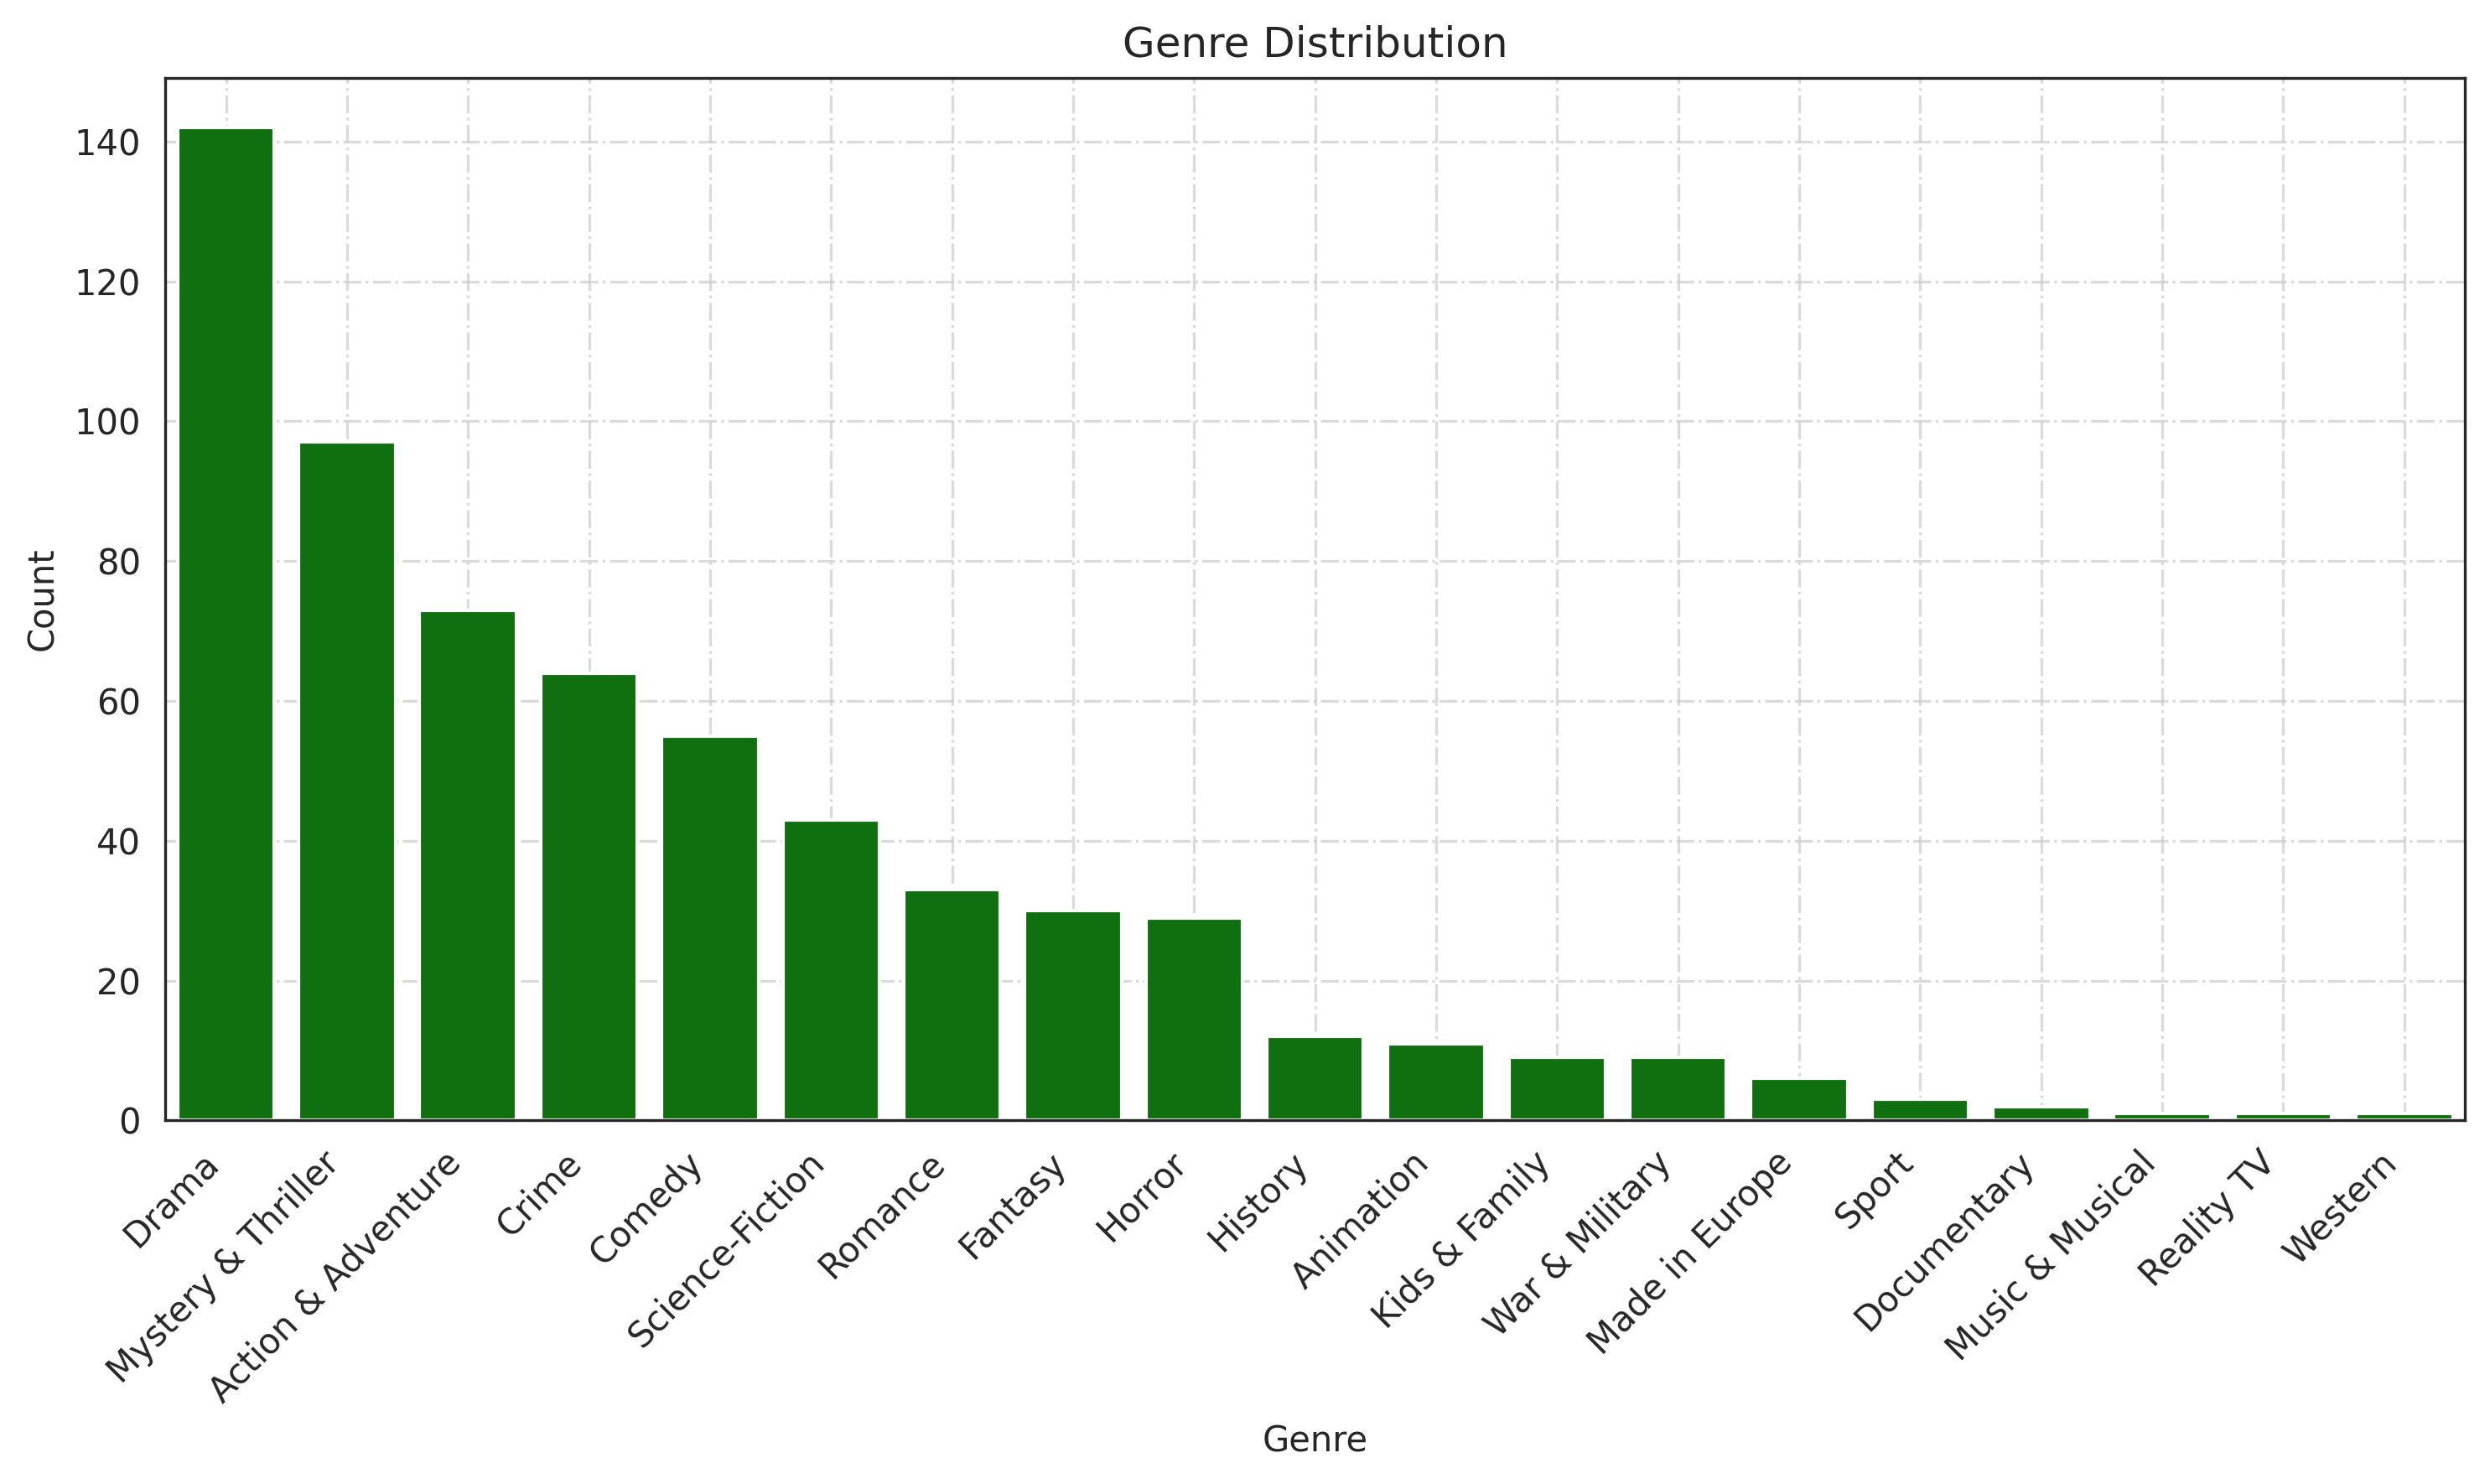

In [ ]:
# Visualizing by bar plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot
plt.figure(figsize=(10, 6), dpi=300)

# Set the style
sns.set_style("white") # style must be one of white, dark, whitegrid, darkgrid, ticks

# Plot the barplot
sns.barplot(x=genre_df['Genre'],y=genre_df["count"],color='green')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')

# Add grid lines only on the y-axis, alpha - transparency level
plt.grid(axis='both', linestyle='dashdot', alpha=0.7) # linestyle - supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Rotate x-axis labels for better readability, ha - horizontal alignment of text
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()


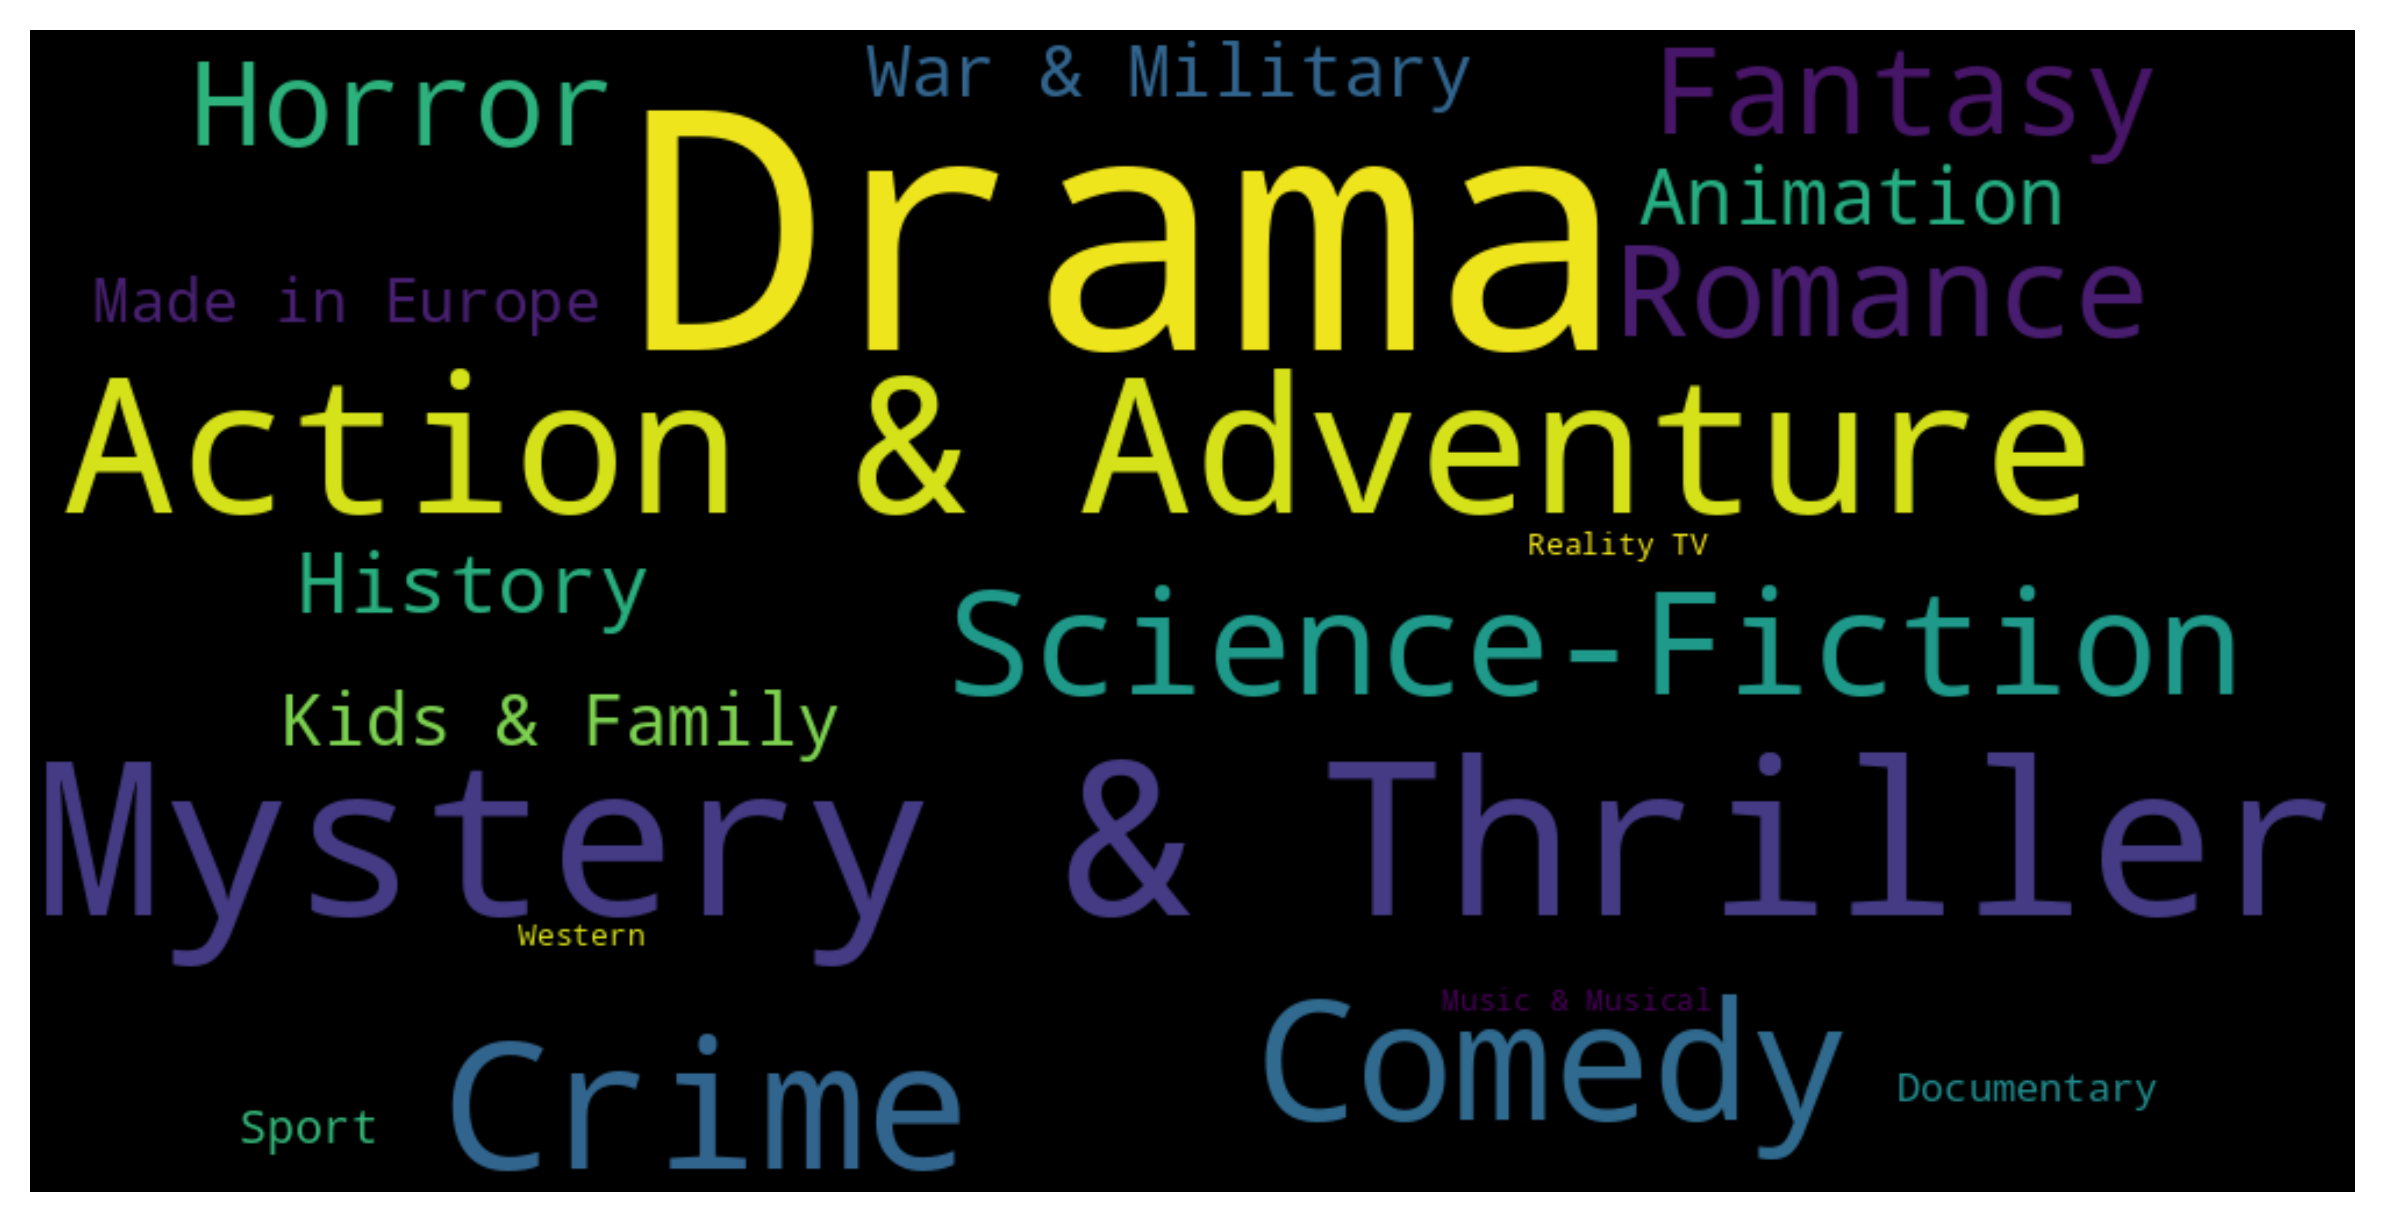

In [ ]:
#Let's Visualise it using word cloud
from wordcloud import WordCloud

# Generate word cloud from genre_count
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate_from_frequencies(genre_count)

plt.figure(figsize=(10, 6), dpi=300)

# interpolation -  to control how the image is rendered and 'bilinear' - to display the word cloud image smoothly
plt.imshow(wordcloud, interpolation='bilinear') # Availabe interpolation - 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'lanczos', 'blackman' etc
plt.axis('off')
plt.show()


**Based on the output provided, it appears to be a distribution of movie genres with their respective counts.**

*Here's a conclusion drawn from the data:*

**Top 5 Genres:** The top genres by count are Drama (145), followed by Mystery & Thriller (97), Action & Adventure (73), Crime (65),  and Comedy (73). This indicates that these genres are quite popular among the sampled movies.

**Less Common Genres:** Some genres have relatively lower counts, such as Sport (3), Documentary (2), Music & Musical (1), Reality TV (1) and Western (1).

**Specialized Genres:** Genres like Animation, Kids & Family, War & Military and Made in Europe cater to specific interests or demographics. They have lower counts compared to more mainstream genres but still represent a segment of the movie market.

## **Finding Predominant Streaming Service**

In [ ]:
# Find top stream service - explode() - Extract individual genres, str.strip() - strip whitespace, and value_counts() - count occurrences.
stream_service_count = movies_shows_df['Streaming Service'].explode().str.strip().value_counts()
stream_service_count


,count
Streaming Service,
Amazon Prime Video,51
Netflix,45
Apple TV,18
Hotstar,17
Jio Cinema,16
Zee5,11
Apple TV+,11
Bookmyshow,7
VI movies and tv,5


In [ ]:
# To convert the Series into a DataFrame with 'Stream_Service' and 'count' columns by Resetting index
df_stream = pd.DataFrame(stream_service_count).reset_index()
df_stream

,Streaming Service,count
0,Amazon Prime Video,51
1,Netflix,45
2,Apple TV,18
3,Hotstar,17
4,Jio Cinema,16
5,Zee5,11
6,Apple TV+,11
7,Bookmyshow,7
8,VI movies and tv,5
9,Crunchyroll,4


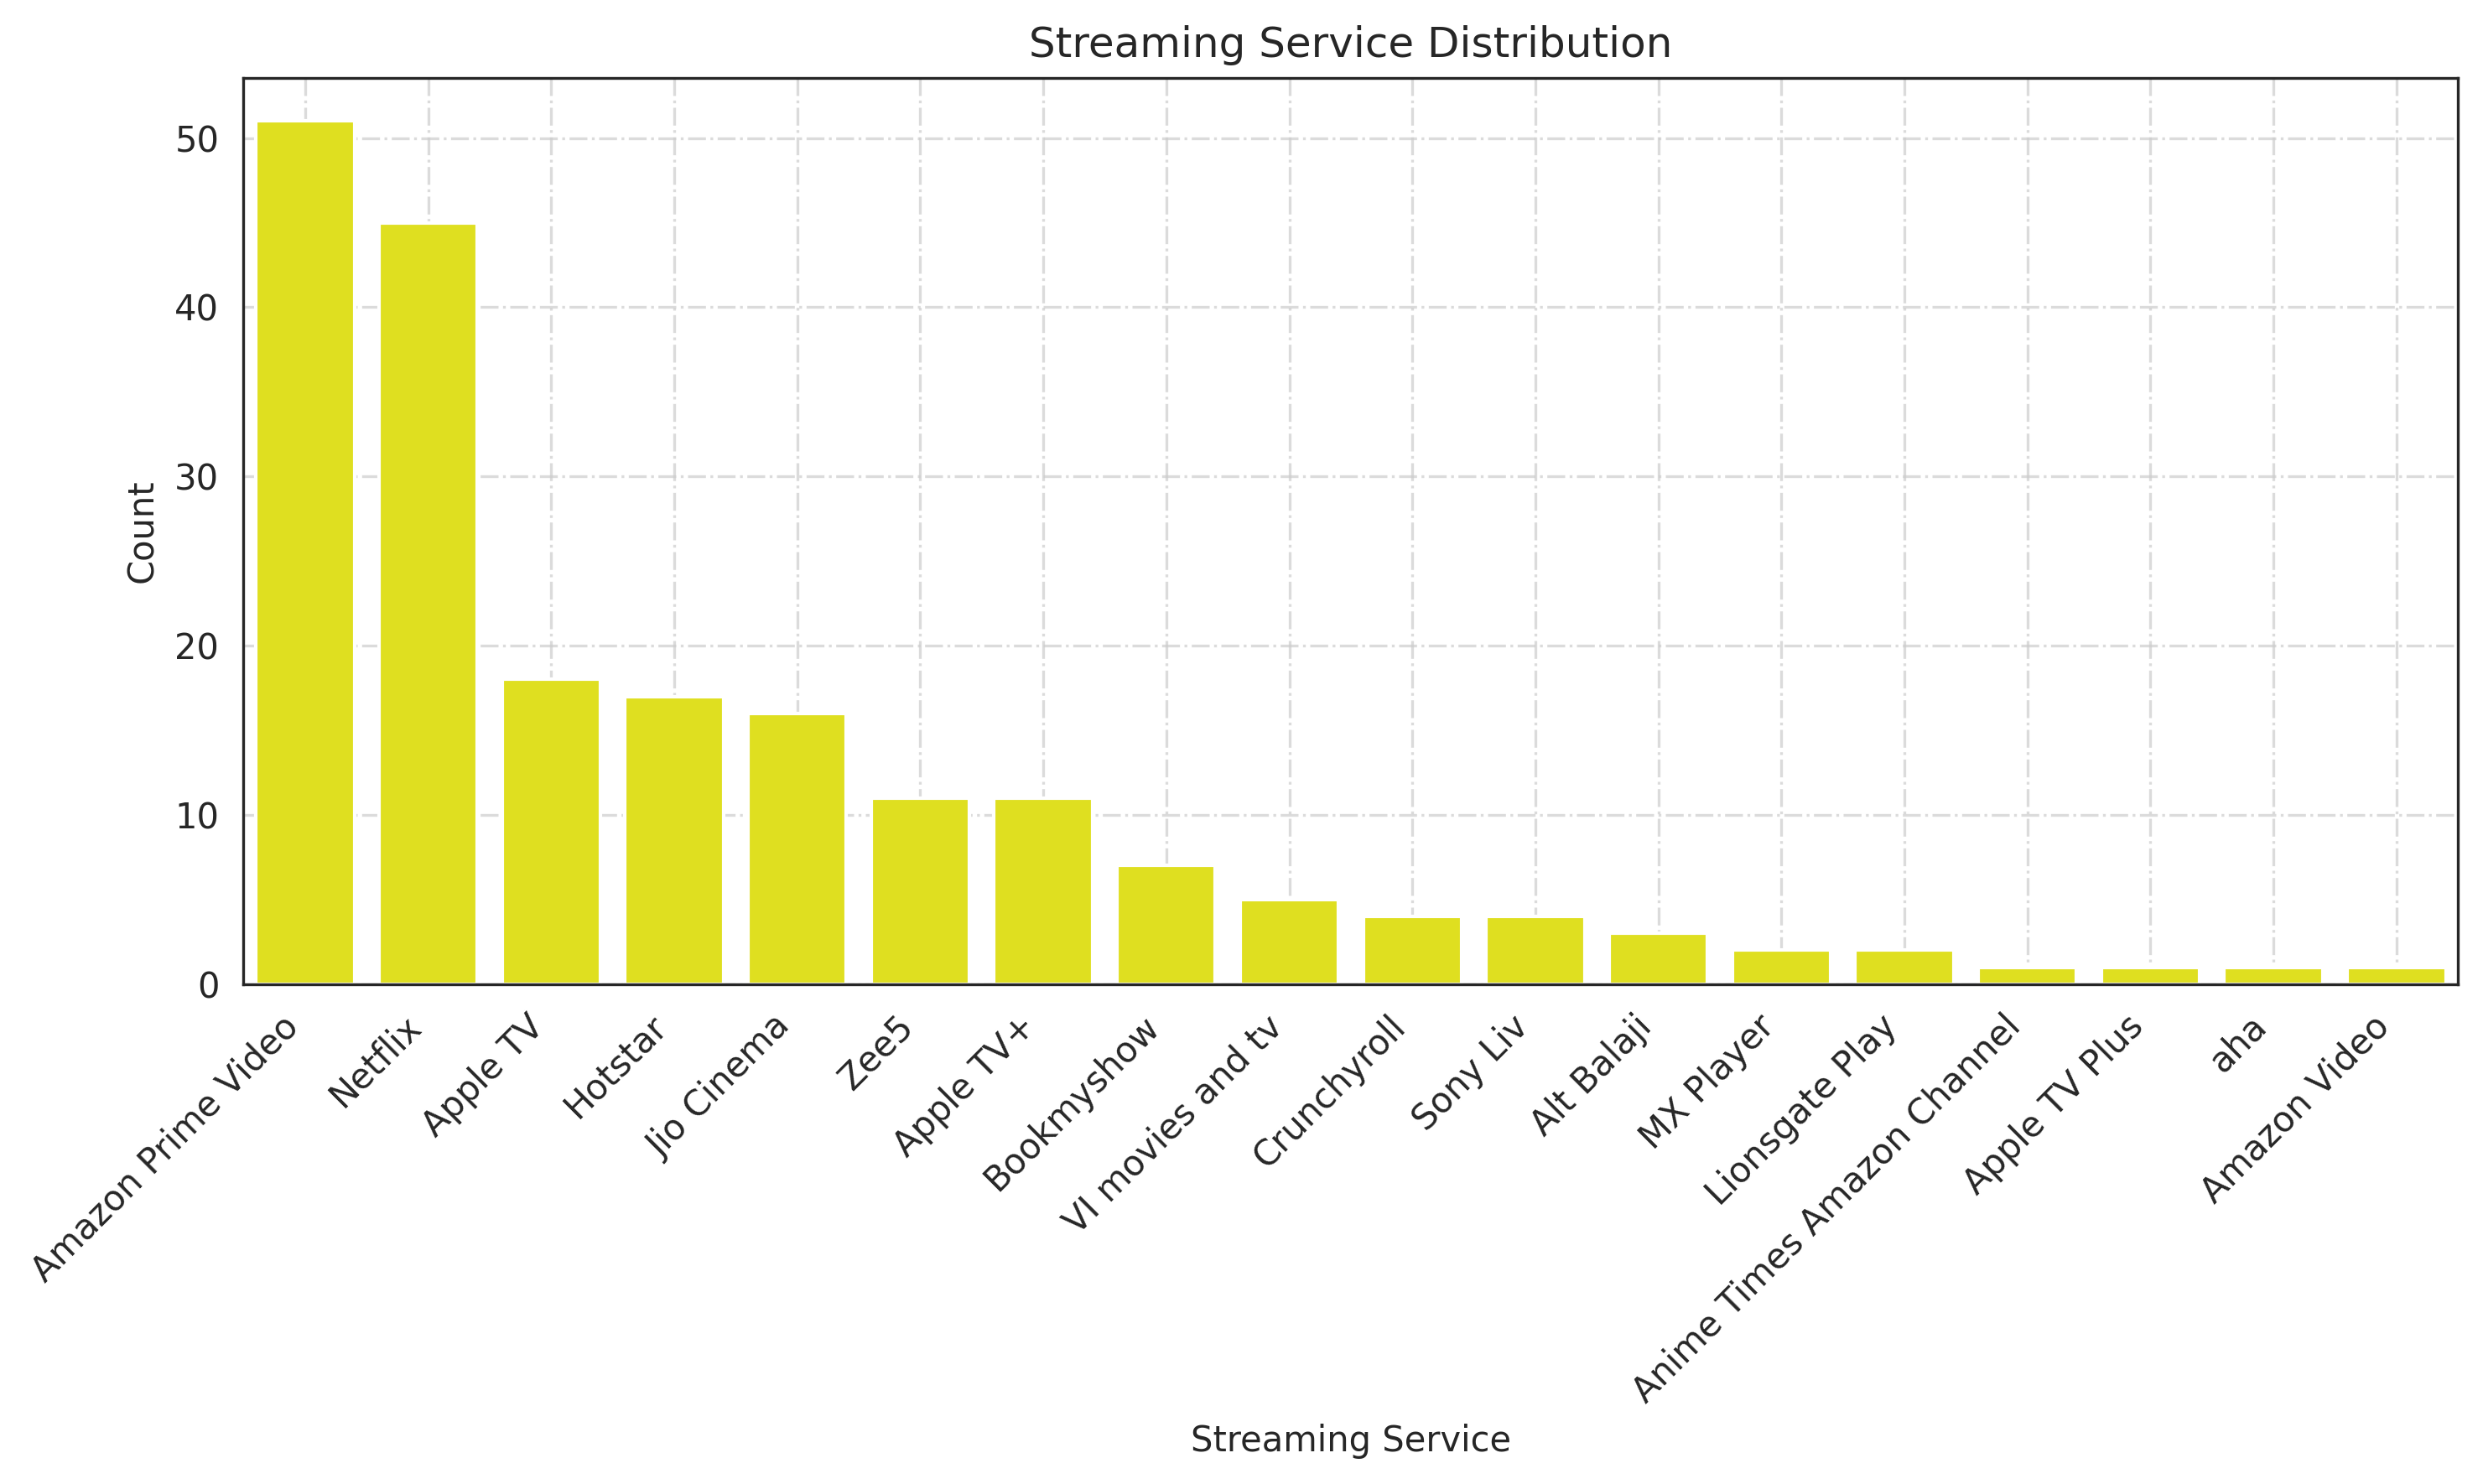

In [ ]:
#Let's Visualize it using bar plot


plt.figure(figsize=(10, 6), dpi=300)

# Plot the barplot
sns.barplot(x=df_stream['Streaming Service'],y=df_stream['count'],data=df_stream,color='Yellow')

# Set the style
sns.set_style("white")

plt.xlabel('Streaming Service')
plt.ylabel('Count')
plt.title('Streaming Service Distribution')

# Add grid lines only on the y-axis, alpha - transparency level
plt.grid(axis='both', linestyle='dashdot', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

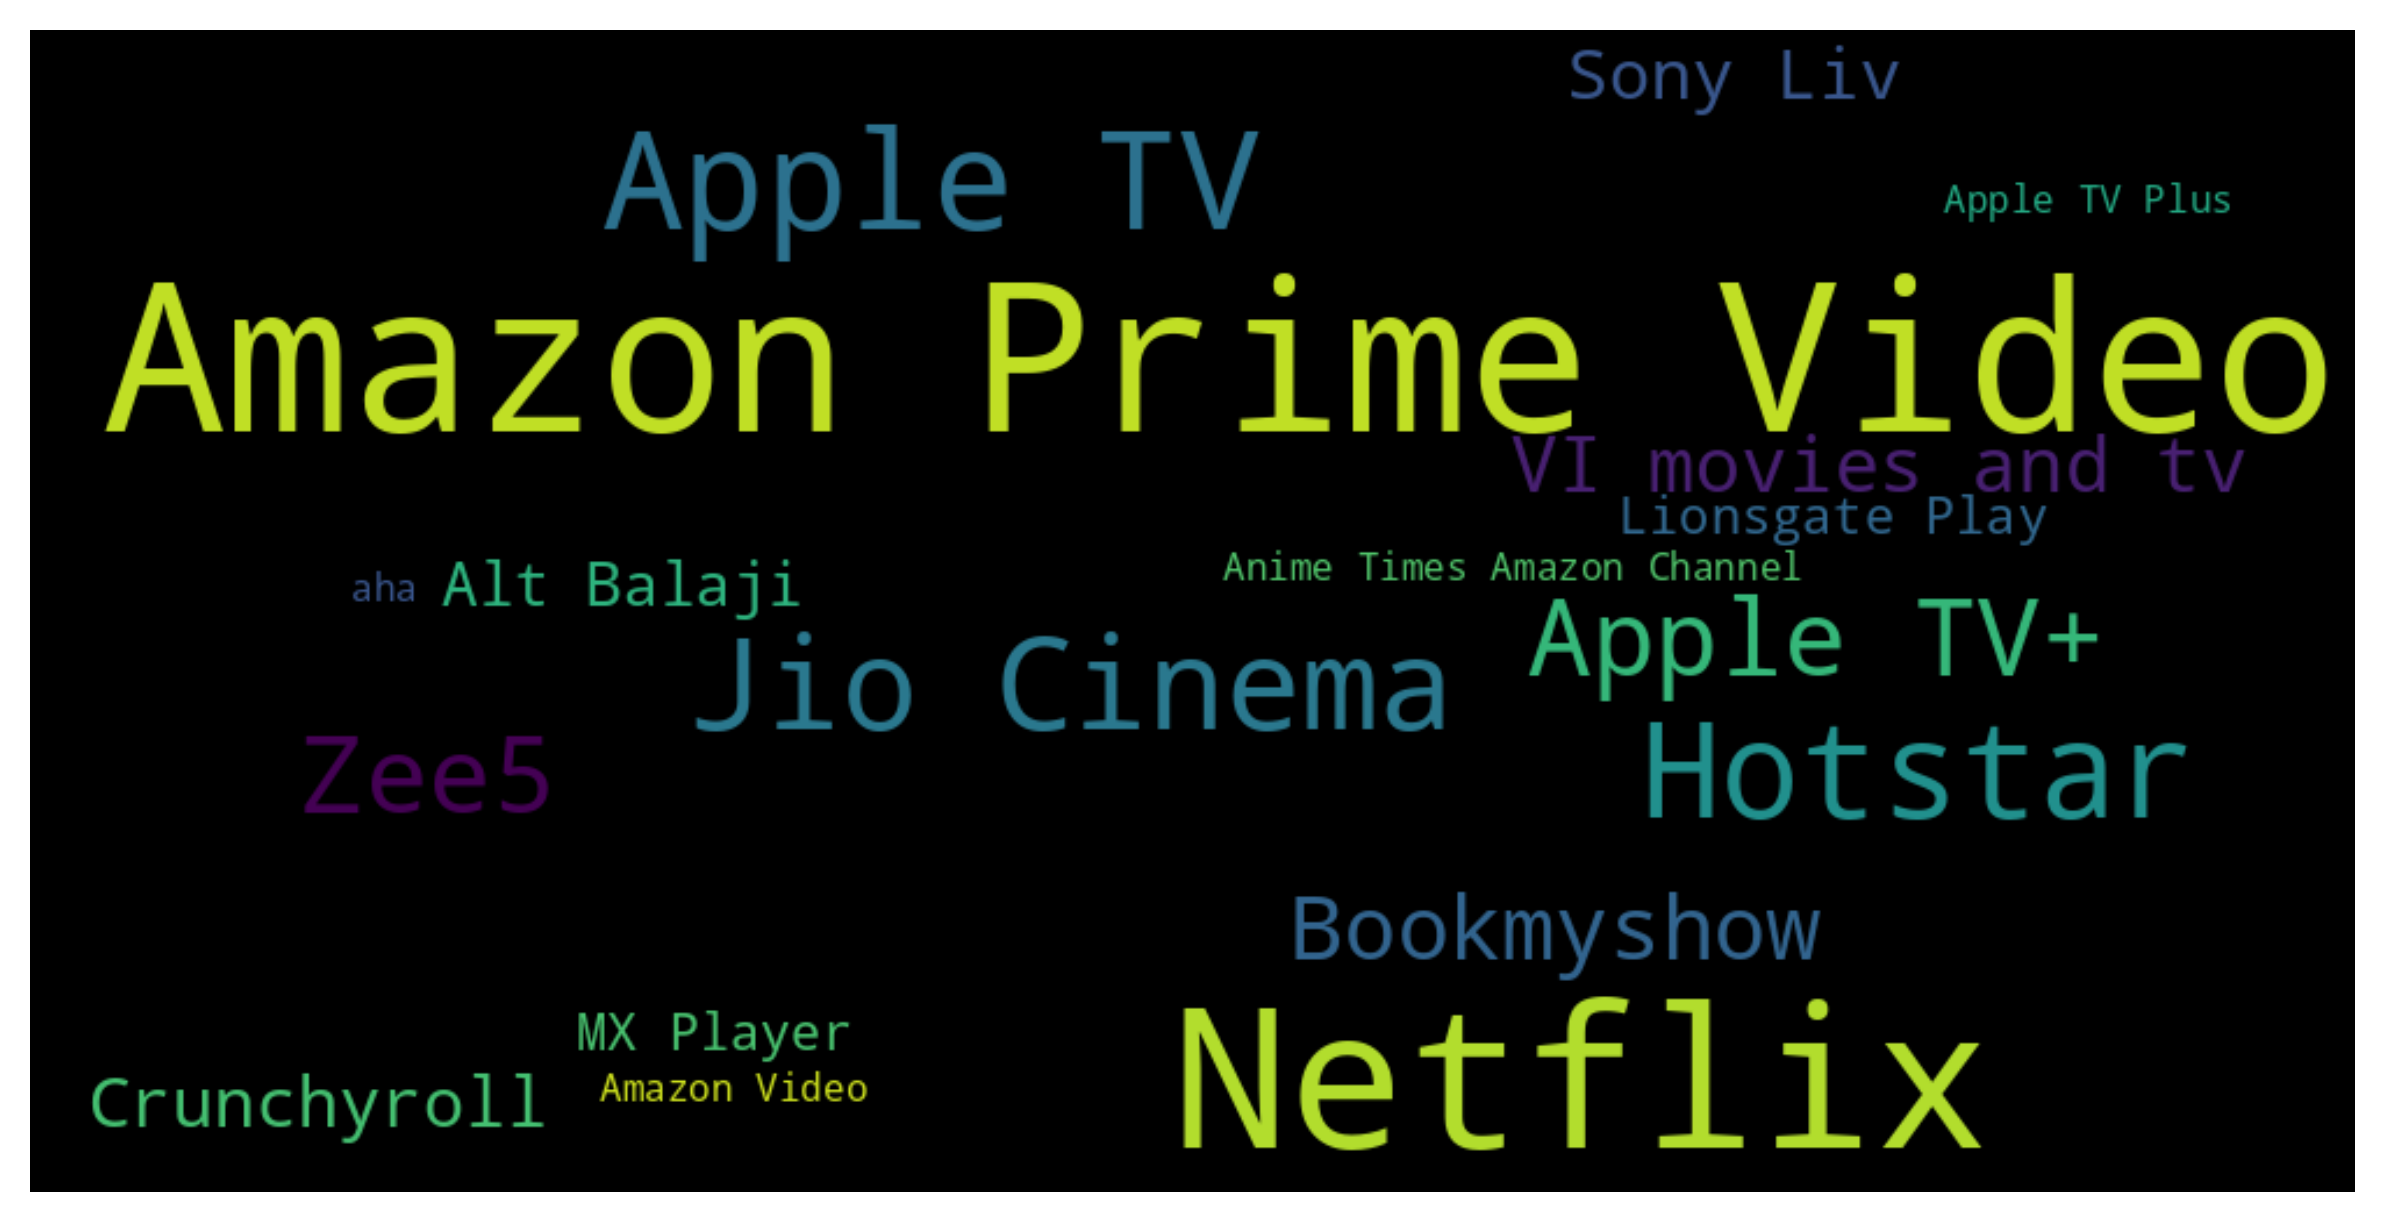

In [ ]:
# #Let's Visualize it using word cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, background_color='black').generate_from_frequencies(stream_service_count)

plt.figure(figsize=(10, 6), dpi=300)

# interpolation = 'bilinear' - to display the word cloud image smoothly
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format

# Exporting the movie dataframe withoud row indices as CSV file
movies_df.to_csv('Movie_Data.csv', index=False)

# Exporting the Tv Show dataframe withoud row indices as CSV file
tv_shows_df.to_csv('Tv_Show_Data.csv', index=False)

# Exporting the movie and Tv Show(Combine) dataframe withoud row indices as CSV file
movies_shows_df.to_csv('Movie_Tv_Show_Data.csv', index=False)


In [ ]:
#saving filter data as Filter Data in csv format

# Exporting the last 2 Year Movie and Tv Show Data as CSV file
last_2_year_df.to_csv('Last_2_Year_Movie_Tv_Show_Data.csv', index=False)

# Exporting the Movie and TvShow Data which has IMDB rating above 7
imdb_rating_df.to_csv('IMDB_Rating_Movie_Tv_Show_Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

*https://colab.research.google.com/drive/1fnrI7168tvYXDxYGdNg1ucIUvi3O30Za?usp=sharing*

# ***Congratulations!!! You have completed your Assignment.***